In [1]:
import pca_sort
import method_1_jules
import method_2_antoine
import method_2_jules
from utils import *
from tqdm import tqdm
import json 

import glob, os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import manifold

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

files = [
    'data/ecoli_100Kb_reads_5x.fasta',
    'data/ecoli_100Kb_reads_10x.fasta',
    'data/ecoli_100Kb_reads_20x.fasta',
    'data/ecoli_100Kb_reads_40x.fasta',
    'data/ecoli_100Kb_reads_80x.fasta',
    'data/ecoli_100Kb_reads_120x.fasta'
]

In [15]:
# PCA sorting
log = {}
file = 'data/ecoli_100Kb_reads_120x.fasta'
for chunk_size in tqdm(range(1600, 121600, 1600)):
    log_monitor_func = monitor(
        func=pca_sort.sort_by_pca(file, "out_x.fasta", chunk_size),
        input_file='out_x.fasta',
        compare_to=f'{file.replace("/", "/headerless/")}.headerless.gz'
        )
    log[chunk_size] = log_monitor_func
    os.remove('out_x.fasta')
    os.remove('out_x.fasta.gz')

    # chunk_size = list(log.keys())
    # exec_time = []
    # compression_ratio = []
    # for chunk_size in log.keys():
    #     compression_ratio.append(log[chunk_size]['compression_ratio'])
    #     exec_time.append(log[chunk_size]['exec_time'])
with open(f"log_{file.replace('data/', '')}", 'a') as f:
    json.dump(log, f)


100%|██████████| 75/75 [10:54<00:00,  8.73s/it]


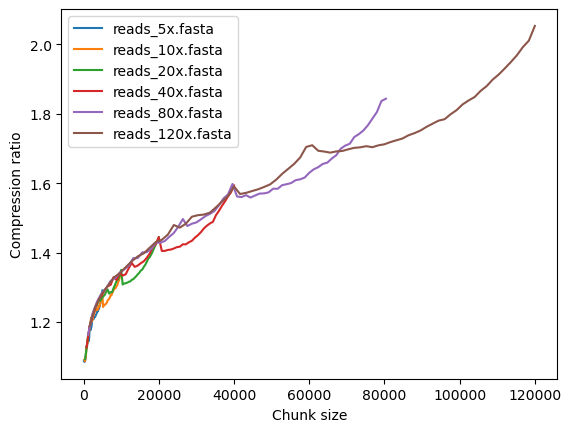

In [3]:
for file in files:
    with open(f"log_{file.replace('data/', '')}", 'r') as f:
        log = json.load(f)

    comp = []
    exec_time = []
    chunk_size = [int(k) for k in log.keys()]
    for cs in chunk_size:
        comp.append(log[str(cs)]['compression_ratio'])
    plt.plot(chunk_size, comp , label=f"{file.replace('data/ecoli_100Kb_', '')}")


plt.xlabel('Chunk size')
plt.ylabel('Compression ratio')
plt.legend()
# plt.xlim(-100, 121000)
# plt.rcParams['figure.figsize'] = [25, 5]
plt.show()


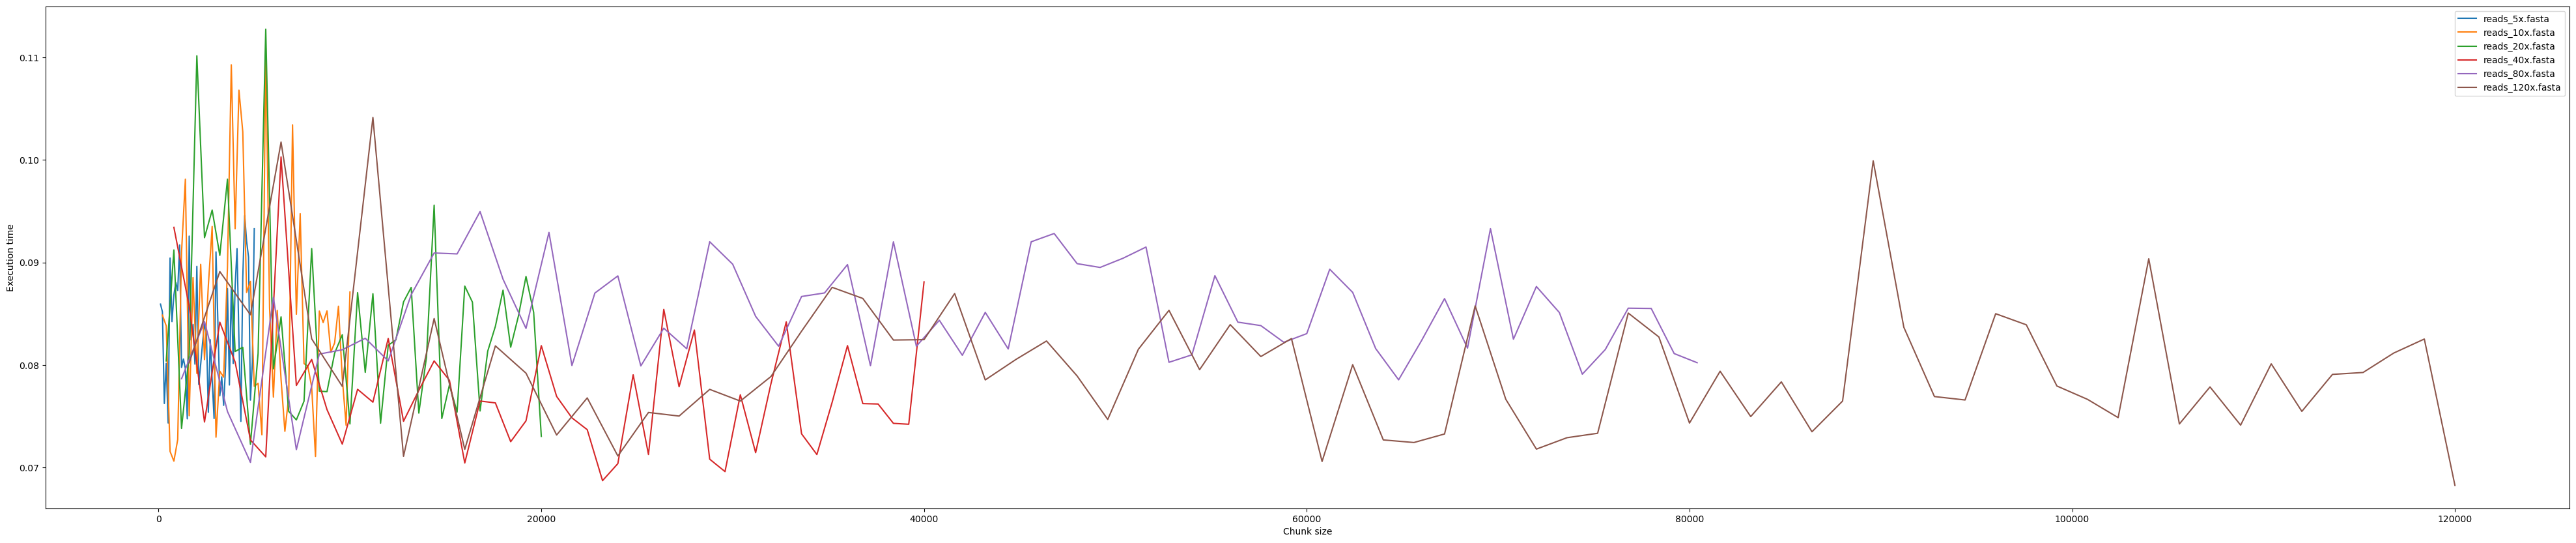

In [7]:
plt.plot([50000,100000,200000,400000,800000,877179,1200000],[0.4233,0.6478,1.4785,2.5330,5.2290,5.6597,8.3159])

plt.xlabel('Chunk size')
plt.ylabel('Execution time')
plt.legend()
# plt.xlim(-100, 121000)
# plt.rcParams['figure.figsize'] = [50, 10]

plt.show()

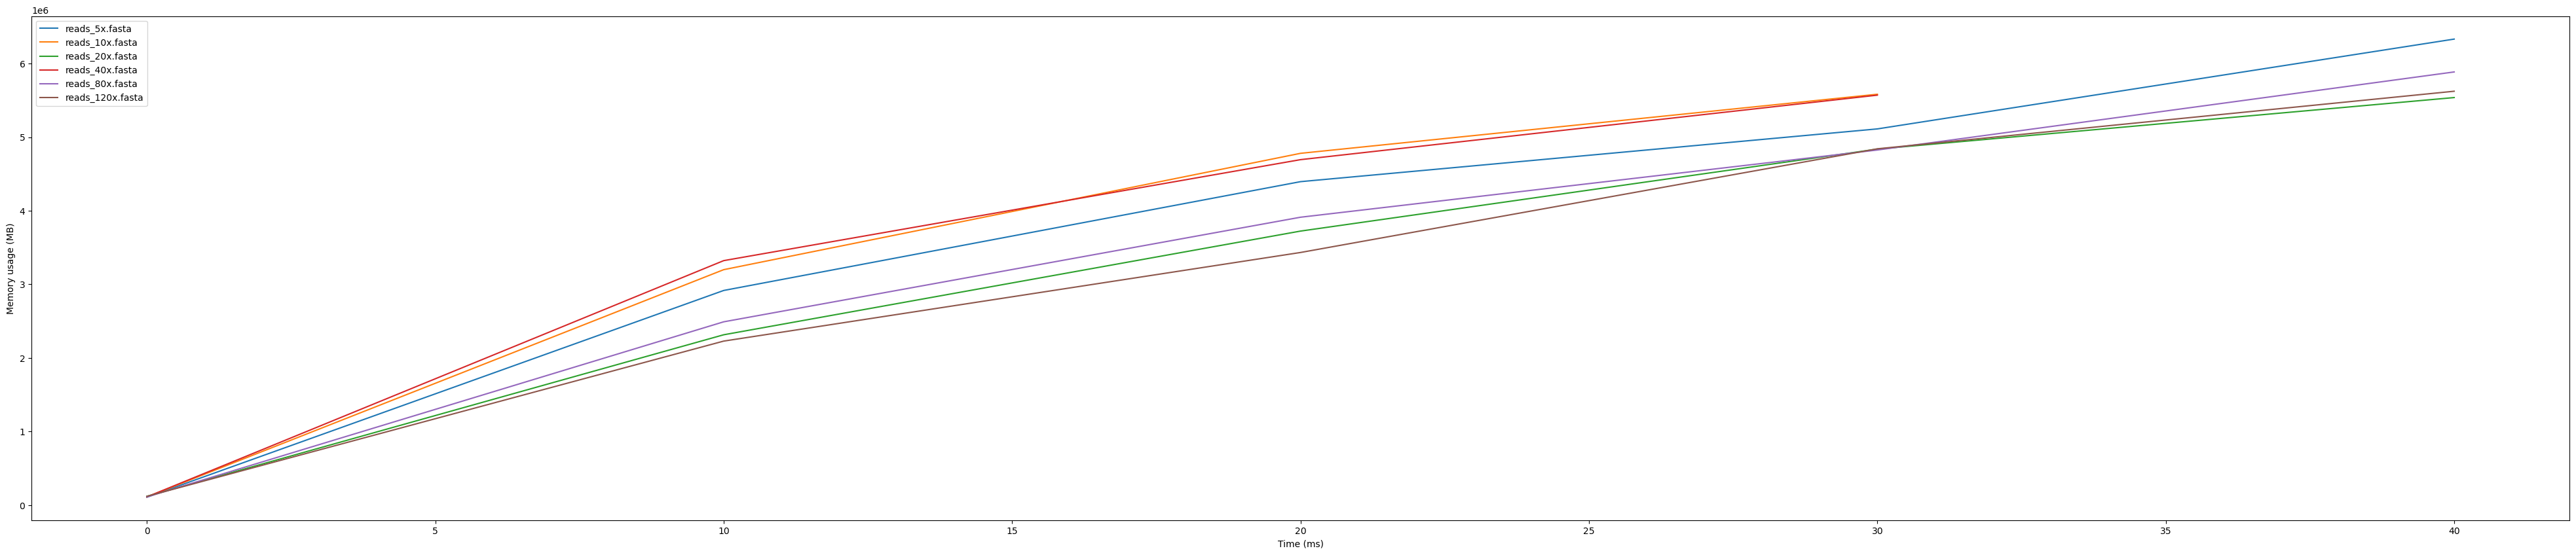

In [8]:
for file in files:
    with open(f"log_{file.replace('data/', '')}", 'r') as f:
        log = json.load(f)

    y = log[str(max(log.keys()))]['mem_usage']
    plt.plot([i for i in range(0, len(y)*10, 10)], log[str(max(log.keys()))]['mem_usage'],  label=f"{file.replace('data/ecoli_100Kb_', '')}")


plt.xlabel('Time (ms)')
plt.ylabel('Memory usage (MB)')
plt.legend()
plt.show()